<p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/scikit-learn-logo-small.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Introduction to Machine Learning with Scikit-learn</h1>


## **Getting started**

There are many Python libraries which provide reliable implementations of machine learning algorithms. One of the most popular is Scikit-Learn (https://scikit-learn.org/stable/index.html), an open-source package that provides efficient versions of a large number of standard algorithms. 

Scikit-Learn is characterized by a clean API, as well as by handy and complete online documentation. A benefit of this uniform API is that once you understand the basic use and syntax for one type of model, switching to a new model is pretty straightforward. 

A guide illustrating some of the Scikit-Learn main features can be found [here](https://scikit-learn.org/stable/getting_started.html).

In this tutorial, we will learn how to use Scikit-Learn to perform a very basic machine learning task involving supervised learning. Let's start!

---


# Importing libraries
As we saw in the Python course, it is a good pratice to first import all the Python libraries that we are going to use in the script.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Download dataset

Now, let's download and have a quick look on the data that we are going to use.


In [4]:
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/dataset.csv'
dataset = pd.read_csv(dataset_url)
print(dataset)

     washing hands  touching face  outcome
0         8.862434      15.637931      ill
1        10.422334      15.404222      ill
2        12.462217      27.923875      ill
3        12.242321      25.734998      ill
4        12.511457      18.840600      ill
..             ...            ...      ...
195      14.613281      18.484341  healthy
196      17.811169      22.817188  healthy
197      16.425944      13.559383  healthy
198      20.922666      23.578661  healthy
199      14.923250      12.524323  healthy

[200 rows x 3 columns]


In our dataset, we have data from about 200 people telling:

*   Mean time spent washing their hands;
*   Mean number of times that they touched their face per hour;
*   And if they got the "*flu virus*" in the following 2 months.

From all this data, we want to develop a model that would perform an useful clinical task for us. For this development, we will apply the **machine learning workflow**.

# **Machine learning workflow**
For this tutorial, we will use the workflow presented during our the theory presentation.



<center><img src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/workflow.png" width="600"></center>



The machine learning workflow try to give us a step-by-step to follow when working with a machine learning project. The first step is to perform the **problem formulation**.

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/problem.png" align="left" hspace="10px" vspace="0px"></p> **Problem formulation**

First step is to frame our machine learning problem. 

Give a try to create an straight forward sentence presenting our project scope. When you are done, check our sentence below:



### Answer

> *Given how often people touch their own face and how long they take washing ther hands, predict if they get ill after 1 month.*

*   Task: Classification
*   Features: Washing hand time and how many times touch the face
*   Target: Outcome after 1 month  


For convinience, let's store our features and targets in lists to use later.

In [0]:
features = ['washing hands', 'touching face']
targets = ['outcome']

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/data.png" align="left" hspace="10px" vspace="0px"></p>  **Data preparation**

In this point, we perform most of the exploratory data analyses and try to deal with the inconsistensies of the data. As we saw in the previous course, Pandas ins an excellent tool to perform this step when we are working with tabular data.

In our case, our dataset is already cleaned and validated for our task. Let's check how it looks like!


In [0]:
X = dataset[features].values
y = dataset[targets].values

In [8]:
print(f'Features type: {type(X)}')
print(f'Target type: {type(y)}')

print(f'Features dimensions: {X.shape}')
print(f'Target dimensions: {y.shape}')

Features type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Features dimensions: (200, 2)
Target dimensions: (200, 1)


It is possible to use the Pandas DataFrame itself to train models and make predictions using the Scikit-Learn library. However, to have more flexibility to plot some graphs, here, we opt to use the data in the numpy array format.

Using this format, we have the following feature matrix and target vector.

![alt text](https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/features_targets.png)

Now, let's try to visualise how our features are distrubuted.

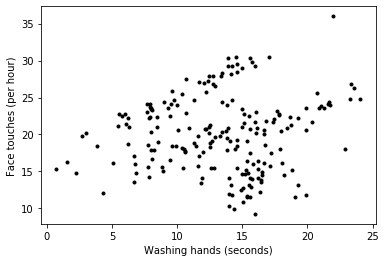

In [10]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color='k')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.show()

Since we are trying to perform classification, let's have a look how the different categories are scattered in our plot.

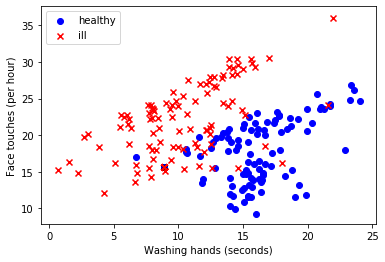

In [0]:
healthy_index = np.where(y=='healthy')
ill_index = np.where(y=='ill')

plt.scatter(X[healthy_index, 0], X[healthy_index, 1], marker='o', color='blue', label='healthy')
plt.scatter(X[ill_index, 0], X[ill_index, 1], marker='x', color='red', label='ill')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.legend()
plt.show()

### **Splitting Your Data**
The previous module introduced the idea of dividing your data set into two subsets:

training set—a subset to train a model.
test set—a subset to test the trained model.

Make sure that your test set meets the following two conditions:

Is large enough to yield statistically meaningful results.
Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.

**Never train on test data**. If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set.

More information:

- https://developers.google.com/machine-learning/data-prep
- https://scikit-learn.org/stable/modules/cross_validation.html

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 160
Test set size: 40


## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/training.png" align="left" hspace="10px" vspace="0px"></p>   **Training model**


Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called empirical risk minimization.

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples. For example, Figure 3 shows a high loss model on the left and a low loss model on the right. Note the following about the figure:


### **Choosing your model**

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.

<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">
<img src="https://scikit-learn.org/stable/_static/ml_map.png">
</a>
Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In our case, we have about 200 samples and we are performing an classification.

Then, the recommended model is the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [0]:
clf = LinearSVC(random_state=0)

In [17]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/evaluation.png" align="left" hspace="10px" vspace="0px"></p>   **Model evaluation**

Fitting a model to some data does not entail that it will predict well on unseen data. This needs to be directly evaluated. We have just seen the train_test_split helper that splits a dataset into train and test sets, but scikit-learn provides many other tools for model evaluation, in particular for cross-validation.

https://scikit-learn.org/stable/modules/model_evaluation.html

https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/


In [0]:
pred = clf.predict(X_test)

In [28]:
print(pred)

['ill' 'healthy' 'ill' 'healthy' 'healthy' 'healthy' 'ill' 'healthy'
 'healthy' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'healthy'
 'ill' 'healthy' 'ill' 'ill' 'healthy' 'ill' 'healthy' 'ill' 'healthy'
 'ill' 'healthy' 'healthy' 'healthy' 'healthy' 'ill' 'healthy' 'ill'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'ill']


In [34]:
print(y_test.flatten())

['ill' 'ill' 'ill' 'healthy' 'healthy' 'healthy' 'ill' 'healthy' 'healthy'
 'ill' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy'
 'ill' 'ill' 'healthy' 'ill' 'healthy' 'ill' 'ill' 'ill' 'ill' 'ill'
 'healthy' 'healthy' 'ill' 'ill' 'ill' 'ill' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'ill']


Since it is a lot of samples being predicted, let's summarise it into some some performance metrics. The Scikit-Learn offer a wide number of options of metrics. They are especific for which machine learning task we are performing. In our case, we are developing an classifier, so an commonly used metric is the accuracy. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

You can check for others metrics from scikit-learn [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [19]:
acc = accuracy_score(y_test, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.825


Accuracy comes out to 0.825, or 82.5% (33 correct predictions out of 40 total examples from the test set). That means our classifier is doing a great job of identifying people in risk, right?

In [0]:
clf.predict(np.array([[20,10]]))

array(['healthy'], dtype=object)

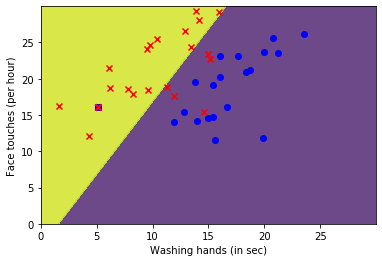

In [0]:
h = .02
cm = plt.cm.RdBu
xx, yy = np.meshgrid(np.arange(0, 30, h),
                        np.arange(0, 30, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z[Z =='ill'] = 1
Z[Z =='healthy'] = 0

plt.contourf(xx, yy, Z, alpha=.8)


healthy_index = np.where(y_test=='healthy')
ill_index = np.where(y_test=='ill')

plt.scatter(X_test[healthy_index, 0], X_test[healthy_index, 1], marker='o', color='blue', label='healthy')
plt.scatter(X_test[ill_index, 0], X_test[ill_index, 1], marker='x', color='red', label='ill')
plt.xlabel('Washing hands (in sec)')
plt.ylabel('Face touches (per hour)')
plt.show()

## **Finalising**
### **Saving model and predictions**

In [0]:
dump(clf, 'classifier.joblib') 

# Exercise

Read and try to implement an scaler in 

Note: fit and transform with the scaler on the training set and then just transform the test set

https://scikit-learn.org/stable/modules/preprocessing.html

In [38]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/dataset.csv')

features = ['washing hands', 'touching face']
targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature engineering
# Check which transformer you want to apply
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
# #####################
# CHANGE THE CODE HERE
# #####################
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #####################

clf = LinearSVC(random_state=0)
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, pred)
print(f'Model Accuracy with Feature Engineering: {acc}')

Model Accuracy with Feature Engineering: 0.925


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# References


https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb

https://scikit-learn.org/stable/modules/classes.html